<a href="https://colab.research.google.com/github/palodavis/IA_RedesNeurais/blob/main/RedesNeuraisRegress%C3%A3oFord.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tratamento dos dados


In [ ]:
#Bib para visualização de dados dinâmicos
#!pip install plotly --upgrade
#!pip install matplotlib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
#Carregar os dados
df = pd.read_csv('ford.csv')
print(df.shape)
df.head()

(17965, 9)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [ ]:
#Checar os valores nulos
df.isna().sum()

model           1
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
# informações básicas dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17964 entries, 0 to 17963
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17964 non-null  object 
 1   year          17964 non-null  int64  
 2   price         17964 non-null  int64  
 3   transmission  17964 non-null  object 
 4   mileage       17964 non-null  int64  
 5   fuelType      17964 non-null  object 
 6   tax           17964 non-null  int64  
 7   mpg           17964 non-null  float64
 8   engineSize    17964 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.4+ MB


In [ ]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17964.000000,17964.000000,17964.000000,17964.000000,17964.000000,17964.000000
mean,2016.864173,12280.078435,23361.880149,113.329437,57.907832,1.350824
std,2.024987,4741.318119,19471.243292,62.008392,10.125632,0.432383
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31052.000000,145.000000,65.700000,1.500000
max,2020.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [ ]:
df["Ano atual"]=2023
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Ano atual
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0,2023
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0,2023
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0,2023
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5,2023
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0,2023


In [ ]:
#Descobrir a idade do carro
df["Age"]=df["Ano atual"]-df["year"]
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Ano atual,Age
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0,2023,6
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0,2023,5
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0,2023,6
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5,2023,4
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0,2023,4


In [ ]:
# Remover a coluna Ano e Ano atual
df.drop(["year"],axis=1,inplace=True)
df.drop(["Ano atual"],axis=1,inplace=True)
df.head(10)

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,Age
0,Fiesta,12000,Automatic,15944,Petrol,150,57.7,1.0,6
1,Focus,14000,Manual,9083,Petrol,150,57.7,1.0,5
2,Focus,13000,Manual,12456,Petrol,150,57.7,1.0,6
3,Fiesta,17500,Manual,10460,Petrol,145,40.3,1.5,4
4,Fiesta,16500,Automatic,1482,Petrol,145,48.7,1.0,4
5,Fiesta,10500,Manual,35432,Petrol,145,47.9,1.6,8
6,Puma,22500,Manual,2029,Petrol,145,50.4,1.0,4
7,Fiesta,9000,Manual,13054,Petrol,145,54.3,1.2,6
8,Kuga,25500,Automatic,6894,Diesel,145,42.2,2.0,4
9,Focus,10000,Manual,48141,Petrol,145,61.4,1.0,5


In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
# Selecionar as colunas categóricas
categorical_columns = ["model", "transmission", "fuelType"]

# Criar um codificador one-hot
encoder = OneHotEncoder(sparse=False, drop="first")  # drop="first" para evitar a multicolinearidade

In [ ]:
# Ajustar e transformar as colunas categóricas
encoded_columns = encoder.fit_transform(df[categorical_columns])

# Obter os nomes das colunas codificadas
encoded_column_names = encoder.get_feature_names_out(input_features=categorical_columns)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Criar um DataFrame com as colunas codificadas
encoded_df = pd.DataFrame(encoded_columns, columns=encoded_column_names)

In [ ]:
# Concatenar as colunas codificadas ao DataFrame original
df_encoded = pd.concat([df, encoded_df], axis=1)

# Descartar as colunas originais categóricas
df_encoded.drop(categorical_columns, axis=1, inplace=True)

# Visualizar o DataFrame resultante
df_encoded.head(10)

,price,mileage,tax,mpg,engineSize,Age,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,12000,15944,150,57.7,1.0,6,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,14000,9083,150,57.7,1.0,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,13000,12456,150,57.7,1.0,6,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,17500,10460,145,40.3,1.5,4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,16500,1482,145,48.7,1.0,4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,10500,35432,145,47.9,1.6,8,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
6,22500,2029,145,50.4,1.0,4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7,9000,13054,145,54.3,1.2,6,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8,25500,6894,145,42.2,2.0,4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,10000,48141,145,61.4,1.0,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


<ipython-input-15-1846b5dec97f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


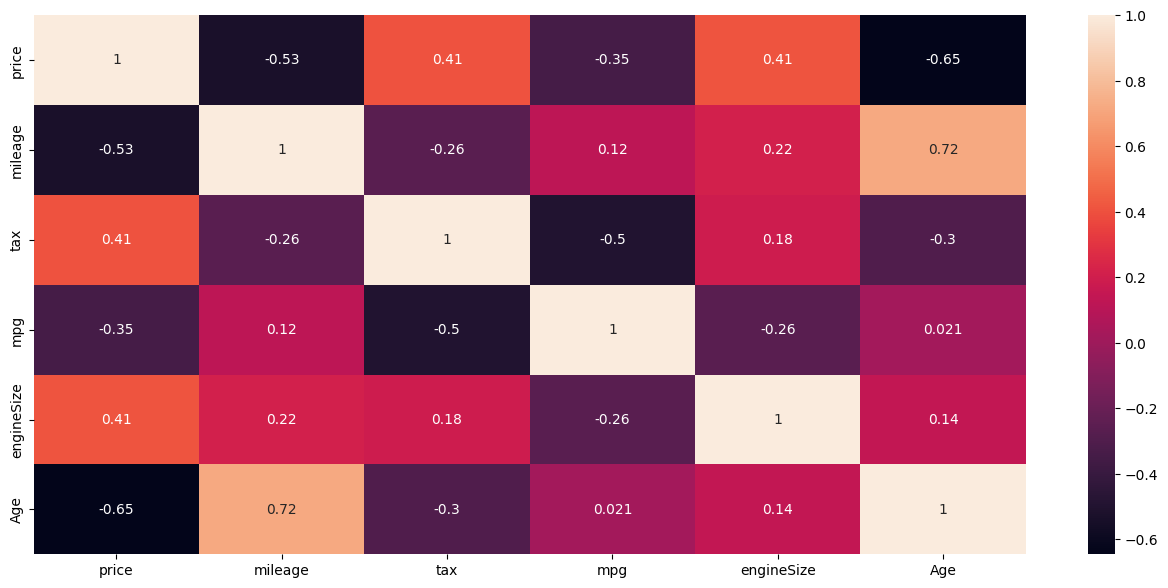

In [ ]:
#Verificar as correlações dos dados pelo mapa de calor
plt.figure(figsize = (16,7))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [ ]:
# Separar as variáveis independentes (X) e a variável dependente (Y)
X_cars = df_encoded.drop('price', axis=1)  # Substitua 'price' pelo nome da coluna de destino
Y_cars = df_encoded['price']  # Substitua 'price' pelo nome da coluna de destino

In [ ]:
len(X_cars.columns)

34

#Treinamento do Modelo e Regressão Linear

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_cars, Y_cars, test_size=0.3, random_state=0)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Redes Neurais

Multilayer Percepton:



As redes neurais artificiais (RNAs) são sistemas computacionais compostos por vários elementos (neurônios) que se interrelacionam de forma conexa, inspirados no funcionamento de neurônios biológicos. Dentre as arquiteturas mais populares de RNAs, destacam-se as redes Multilayer Perceptron (MLP), as quais são aplicadas com sucesso a uma grande variedade de problemas de processamento de informação, incluindo classificação, aproximação de funções (regressão) e previsão de séries temporais.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


def build_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(35, activation='relu', input_dim=X_train.shape[1]),
    tf.keras.layers.Dense(70, activation='relu'),
    tf.keras.layers.Dense(70, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
  ])

  model.compile(loss='mse',
                optimizer='adam',
                metrics=['mae','mse'])
  return model

In [ ]:
model = build_model()
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 35)                1225      
                                                                 
 dense_67 (Dense)            (None, 70)                2520      
                                                                 
 dense_68 (Dense)            (None, 70)                4970      
                                                                 
 dense_69 (Dense)            (None, 1)                 71        
                                                                 
Total params: 8786 (34.32 KB)
Trainable params: 8786 (34.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, batch_size = 32, epochs = 30, validation_data=(X_test, y_test))

Epoch 1/30
393/393 [==============================] - 2s 4ms/step - loss: 80228664.0000 - mae: 6931.1729 - mse: 80228664.0000 - val_loss: 4149114.2500 - val_mae: 1508.2615 - val_mse: 4149114.2500
Epoch 2/30
393/393 [==============================] - 2s 4ms/step - loss: 3388642.2500 - mae: 1333.3856 - mse: 3388642.2500 - val_loss: 3096974.7500 - val_mae: 1262.2668 - val_mse: 3096974.7500
Epoch 3/30
393/393 [==============================] - 4s 9ms/step - loss: 2863384.2500 - mae: 1213.3011 - mse: 2863384.2500 - val_loss: 2846316.0000 - val_mae: 1205.6207 - val_mse: 2846316.0000
Epoch 4/30
393/393 [==============================] - 4s 10ms/step - loss: 2639845.2500 - mae: 1155.4948 - mse: 2639845.2500 - val_loss: 2680525.2500 - val_mae: 1140.7474 - val_mse: 2680525.2500
Epoch 5/30
393/393 [==============================] - 1s 3ms/step - loss: 2502113.0000 - mae: 1122.1738 - mse: 2502113.0000 - val_loss: 2578938.0000 - val_mae: 1117.4613 - val_mse: 2578938.0000
Epoch 6/30
393/393 [=======

In [ ]:
from sklearn.metrics import r2_score
previsoes = model.predict(X_test)
r2_score(y_test, previsoes)

169/169 [==============================] - 0s 1ms/step


0.9139100843044273

# Gráfico com Batch Normalization e Sem Batch Normalization

In [ ]:
from keras.optimizers import Adam, SGD

def build_model_bn():
  model_bn = tf.keras.Sequential([
    tf.keras.layers.Dense(35, activation='relu', input_dim=X_train.shape[1]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(70, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(70, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(140, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(140, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='linear')
  ])
  model_bn.compile(loss='mse',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['mse'])
  return model_bn

def build_model_sem_bn():
  model_sem_bn = tf.keras.Sequential([
    tf.keras.layers.Dense(35, activation='relu', input_dim=X_train.shape[1]),
    tf.keras.layers.Dense(70, activation='relu'),
    tf.keras.layers.Dense(70, activation='relu'),
    tf.keras.layers.Dense(1)
  ])
  model_sem_bn.compile(loss='mse',
                optimizer='adam',
                metrics=['mse'])
  return model_sem_bn


def plot_loss_history(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(12, 6))
    plt.plot(loss, label='Training Loss', color='blue')
    plt.plot(val_loss, label='Validation Loss', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(title)
    plt.legend()
    plt.show()

169/169 [==============================] - 0s 2ms/step
R2 with Batch Normalization: 0.9157813761204232


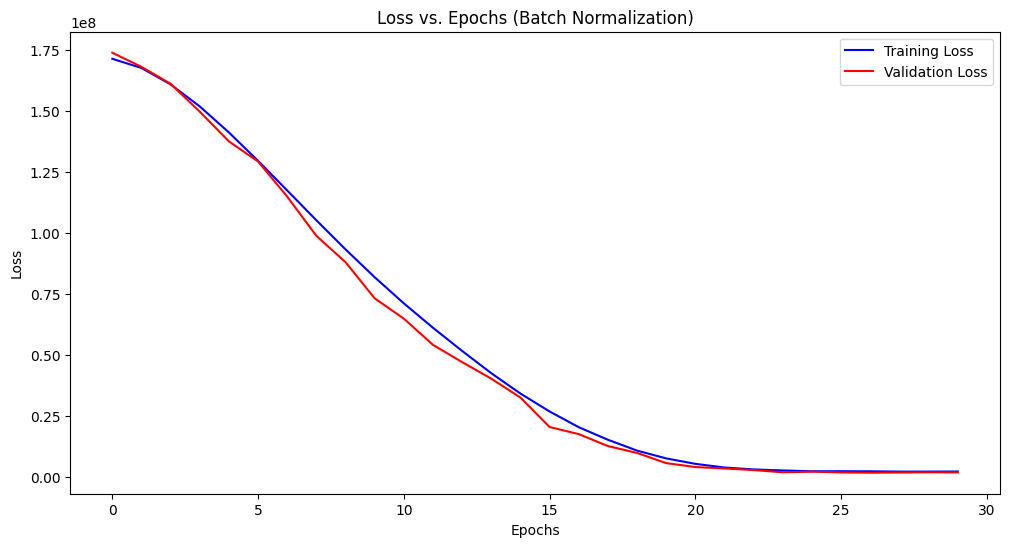

In [ ]:
model_bn = build_model_bn()

history_bn = model_bn.fit(X_train, y_train, batch_size = 32, epochs = 30, validation_data=(X_test, y_test), verbose = 0)

# Avaliar o modelo
previsoes_bn = model_bn.predict(X_test)
r2_bn = r2_score(y_test, previsoes_bn)
print("R2 with Batch Normalization:", r2_bn)

#Gráfico para o Batch Normalization
plot_loss_history(history_bn, 'Loss vs. Epochs (Batch Normalization)')

169/169 [==============================] - 0s 2ms/step
R2 sem Batch Normalization: 0.9141436973307555


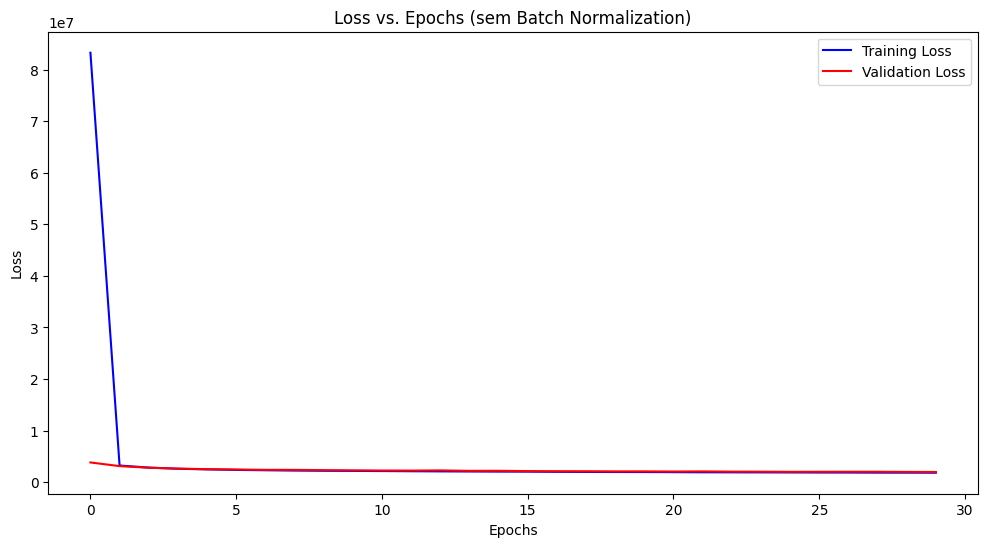

In [ ]:
model_sem_bn = build_model_sem_bn()

history_sem_bn = model_sem_bn.fit(X_train, y_train, batch_size = 32, epochs = 30, validation_data=(X_test, y_test), verbose = 0)

# Avaliar o modelo
previsoes_sem_bn = model_sem_bn.predict(X_test)
r2_sem_bn = r2_score(y_test, previsoes_sem_bn)
print("R2 sem Batch Normalization:", r2_sem_bn)

#Gráfico para sem Normalization
plot_loss_history(history_sem_bn, 'Loss vs. Epochs (sem Batch Normalization)')

# Gráfico com Glorot e Sem Glorot

In [ ]:

def build_model_glorot():
  model_glorot = tf.keras.Sequential([
    tf.keras.layers.Dense(35, kernel_initializer='glorot_normal', input_dim=X_train.shape[1]),
    tf.keras.layers.Dense(70, kernel_initializer='glorot_normal'),
    tf.keras.layers.Dense(70, kernel_initializer='glorot_normal'),
    tf.keras.layers.Dense(1)
  ])
  model_glorot.compile(loss='mse',
                optimizer='adam',
                metrics=['mse'])
  return model_glorot

def build_model_sem_glorot():
  model_sem_glorot = tf.keras.Sequential([
    tf.keras.layers.Dense(35, kernel_initializer='glorot_normal', input_dim=X_train.shape[1]),
    tf.keras.layers.Dense(70, kernel_initializer='glorot_normal'),
    tf.keras.layers.Dense(70, kernel_initializer='glorot_normal'),
    tf.keras.layers.Dense(1)
  ])
  model_sem_glorot.compile(loss='mse',
                optimizer='adam',
                metrics=['mse'])
  return model_sem_glorot


def plot_loss_history_glorot(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(12, 6))
    plt.plot(loss, label='Training Loss', color='blue')
    plt.plot(val_loss, label='Validation Loss', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(title)
    plt.legend()
    plt.show()

169/169 [==============================] - 0s 1ms/step
R2 com Glorot: 0.8410153653072796


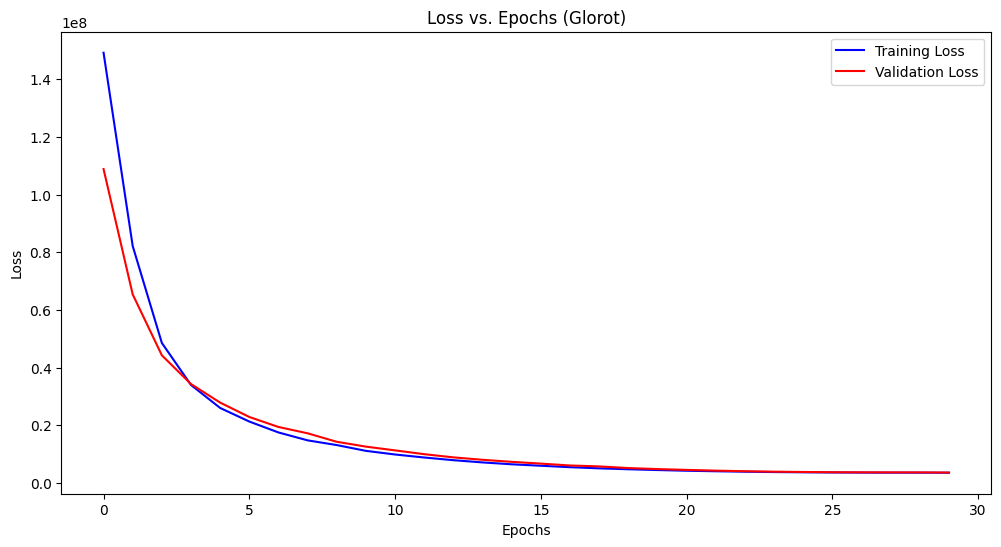

In [ ]:
model_glorot = build_model_glorot()

history_glorot = model_glorot.fit(X_train, y_train, batch_size = 32, epochs = 30, validation_data=(X_test, y_test), verbose = 0)

# Avaliar o modelo
previsoes_glorot = model_glorot.predict(X_test)
r2_glorot = r2_score(y_test, previsoes_glorot)
print("R2 com Glorot:", r2_glorot)

#Gráfico para o Glorot
plot_loss_history(history_glorot, 'Loss vs. Epochs (Glorot)')

169/169 [==============================] - 0s 2ms/step
R2 sem Glorot: 0.9140103156456313


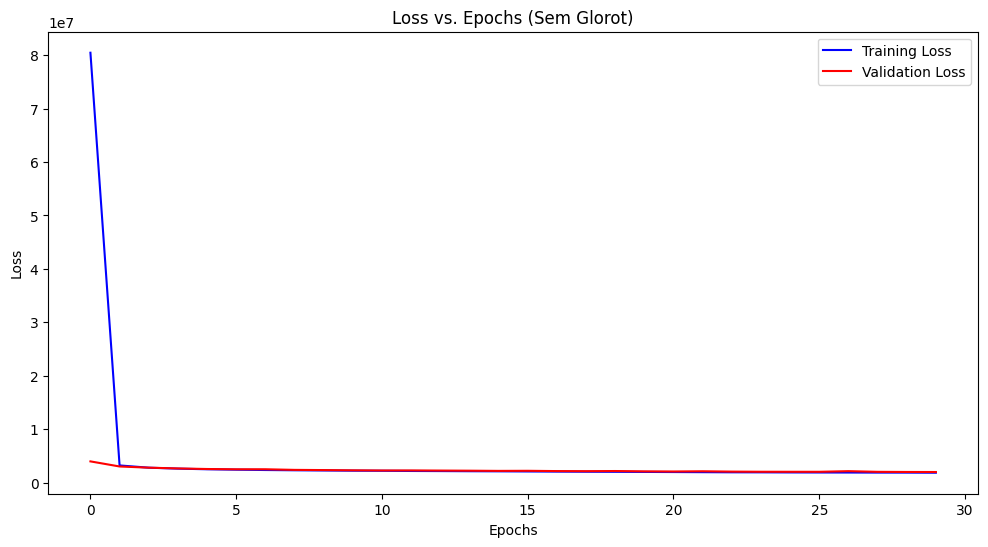

In [ ]:
model_sem_glorot = build_model_sem_glorot()

history_sem_glorot = model_sem_glorot.fit(X_train, y_train, batch_size = 32, epochs = 30, validation_data=(X_test, y_test), verbose = 0)

# Avaliar o modelo
previsoes_sem_glorot = model_sem_glorot.predict(X_test)
r2_sem_glorot = r2_score(y_test, previsoes_sem_glorot)
print("R2 sem Glorot:", r2_sem_glorot)

#Gráfico para o Batch Normalization
plot_loss_history_glorot(history_sem_glorot, 'Loss vs. Epochs (Sem Glorot)')

# Gráfico com Power Scheduling e Exponencial Scheduling

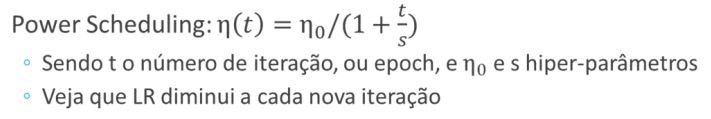

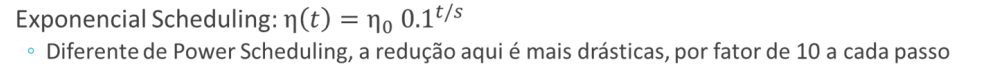

Exponencial Sheduling - Objetivo: Esta função implementa um agendamento exponencial da taxa de aprendizado, onde a taxa de aprendizado diminui exponencialmente ao longo das épocas.

Power Decay: Objetivo: Esta função implementa um agendamento de taxa de aprendizado com Power Scheduling, onde a taxa de aprendizado diminui de acordo com uma função de potência.

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD
from keras.layers import BatchNormalization
from keras.callbacks import LearningRateScheduler
from keras.regularizers import l2  #regularizador L2
from keras.layers import Dropout  # Importe a camada de Dropout

import numpy as np

# Função para agendamento exponencial da taxa de aprendizado com Exponential Scheduling
def exponential_decay(epoch, lr):
    initial_lr = 0.01  # Taxa de aprendizado inicial
    decay_rate = 0.9  # Taxa de decaimento
    decay_step = 10  # Número de épocas por etapa de decaimento
    return initial_lr * (decay_rate ** (epoch // decay_step))

# Função para agendamento de taxa de aprendizado com Power Scheduling
def power_decay(epoch):
    initial_lr = 0.01  # Taxa de aprendizado inicial
    power = 0.5  # Expoente da função de potência
    return initial_lr * (1.0 / (1.0 + power * epoch))

def plot_loss_history_scheduler(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(12, 6))
    plt.plot(loss, label='Training Loss', color='blue')
    plt.plot(val_loss, label='Validation Loss', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(title)
    plt.legend()
    plt.show()

def build_model_scheduler():
  model_scheduler = tf.keras.Sequential([
    tf.keras.layers.Dense(35, activation='relu', input_dim=X_train.shape[1]),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Dense(70, activation='relu'),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Dense(70, activation='relu'),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Dense(1)
  ])
  model_scheduler.compile(loss='mse',
                optimizer='adam',
                metrics=['mse'])
  return model_scheduler


# Display the model summary.
model_scheduler = build_model_scheduler()
model_scheduler.summary

# Callback para scheduling de taxa de aprendizado com Exponential Scheduling
lr_callback_exponential = LearningRateScheduler(exponential_decay, verbose=0)

# Callback para scheduling de taxa de aprendizado com Power Scheduling
lr_callback_power = LearningRateScheduler(power_decay, verbose=0)

169/169 [==============================] - 0s 2ms/step
R2 com Power Sheduling 0.9079695318101038


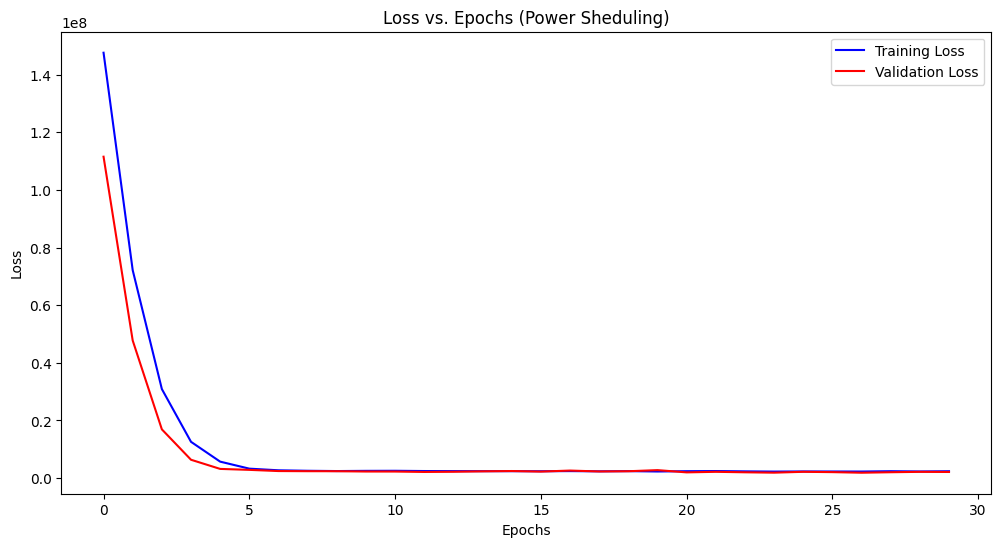

In [ ]:
history_power = model_scheduler.fit(X_train, y_train, batch_size = 32, epochs = 30, validation_data=(X_test, y_test), callbacks=[lr_callback_power], verbose=0)


previsoes_power = model_scheduler.predict(X_test)
r2_power = r2_score(y_test, previsoes_power)

print("R2 com Power Sheduling", r2_power)

plot_loss_history_scheduler(history_power, 'Loss vs. Epochs (Power Sheduling)')

169/169 [==============================] - 0s 2ms/step
R2 com exponential sheduler 0.9214155758856406


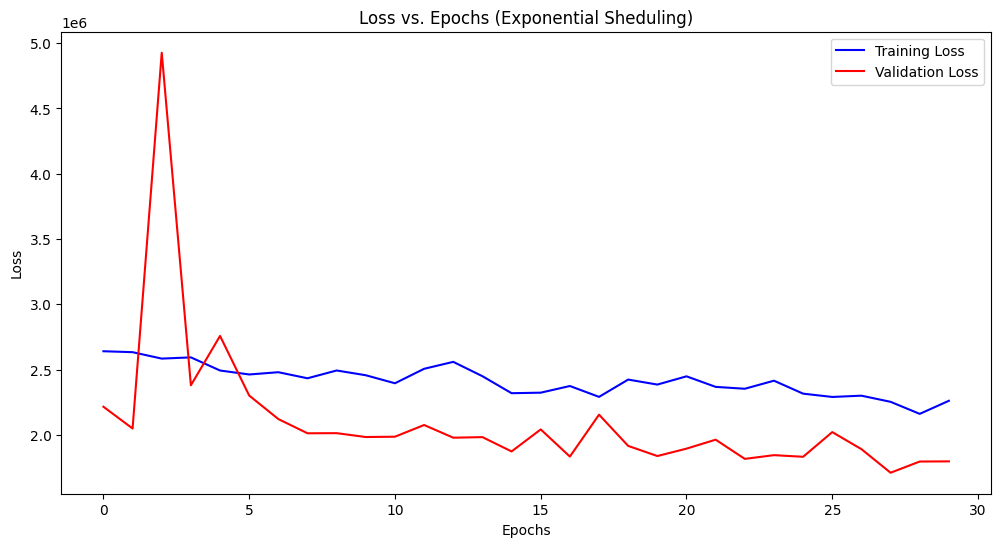

In [ ]:
history_exponential = model_scheduler.fit(X_train, y_train, batch_size = 32, epochs = 30, validation_data=(X_test, y_test), callbacks=[lr_callback_exponential], verbose=0)


previsoes_exponential = model_scheduler.predict(X_test)
r2_exponential = r2_score(y_test, previsoes_exponential)

print("R2 com exponential sheduler", r2_exponential)

plot_loss_history_scheduler(history_exponential, 'Loss vs. Epochs (Exponential Sheduling)')

# Gráfico com L2 e Dropout

In [ ]:
from keras.optimizers import Adam, SGD

def build_model_l2():
  model_l2 = tf.keras.Sequential([
    tf.keras.layers.Dense(35, activation='relu', kernel_regularizer=l2(0.01), input_dim=X_train.shape[1]),
    tf.keras.layers.Dense(70, activation='relu', kernel_regularizer=l2(0.01)),
    tf.keras.layers.Dense(70, activation='relu', kernel_regularizer=l2(0.01)),
    tf.keras.layers.Dense(1)
  ])
  model_l2.compile(loss='mse',
                optimizer='adam',
                metrics=['mse'])
  return model_l2

def build_model_dropout():
  model_dropout = tf.keras.Sequential([
    tf.keras.layers.Dense(35, activation='relu', input_dim=X_train.shape[1]),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(70, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(70, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)
    ])
  model_dropout.compile(loss='mse',
                optimizer='adam',
                metrics=['mse'])
  return model_dropout


def plot_loss_historyRegularizacao(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(12, 6))
    plt.plot(loss, label='Training Loss', color='blue')
    plt.plot(val_loss, label='Validation Loss', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(title)
    plt.legend()
    plt.show()

169/169 [==============================] - 1s 3ms/step
R2 com Dropout 0.9005496591446754


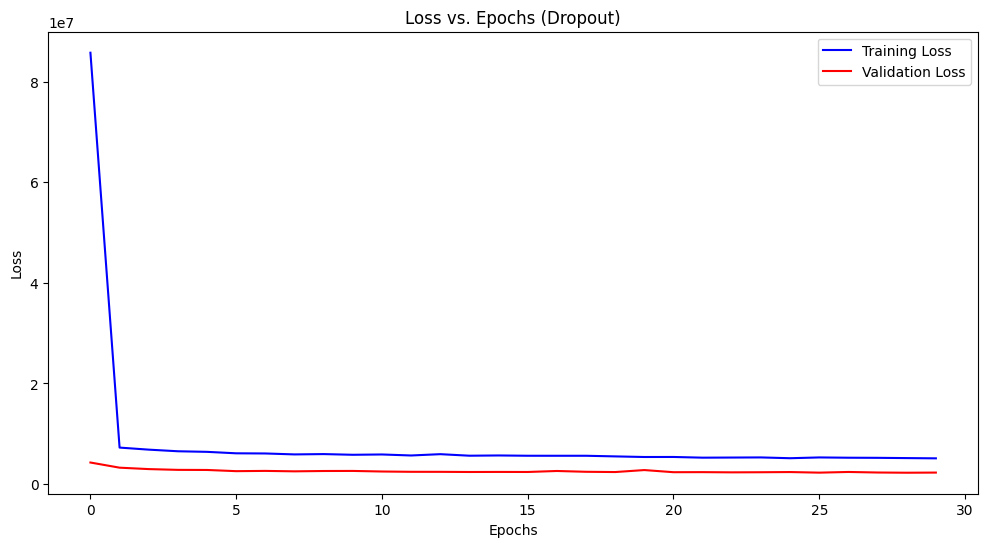

In [ ]:
model_dropout = build_model_dropout()

history_dropout = model_dropout.fit(X_train, y_train, batch_size = 32, epochs = 30, validation_data=(X_test, y_test), verbose=0)

previsoes_dropout = model_dropout.predict(X_test)
r2_dropout = r2_score(y_test, previsoes_dropout)

print("R2 com Dropout", r2_dropout)

plot_loss_historyRegularizacao(history_dropout, 'Loss vs. Epochs (Dropout)')

169/169 [==============================] - 0s 1ms/step
R2 com L2 0.9144745513729449


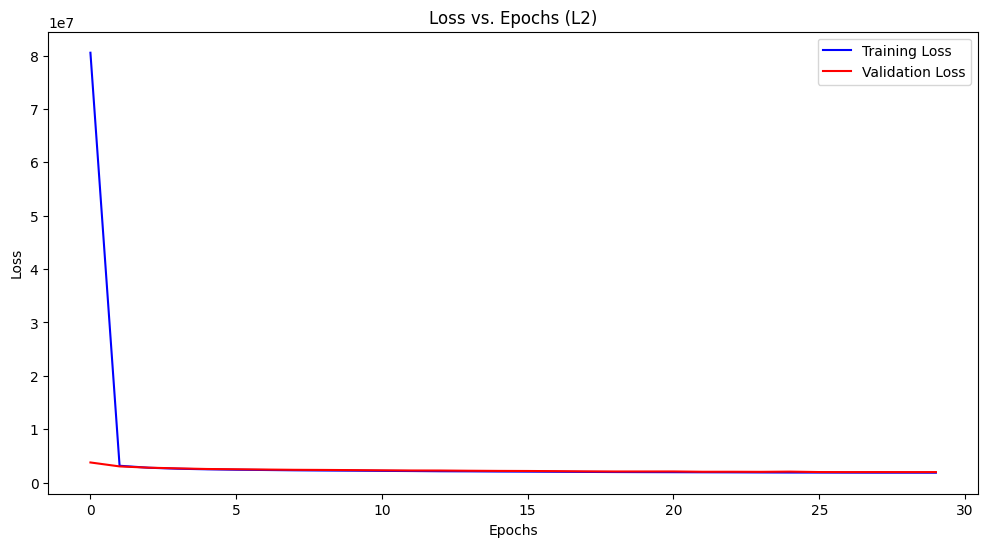

In [ ]:
model_l2 = build_model_l2()

history_l2 = model_l2.fit(X_train, y_train, batch_size = 32, epochs = 30, validation_data=(X_test, y_test), verbose=0)


previsoes_l2 = model_l2.predict(X_test)
r2_l2 = r2_score(y_test, previsoes_l2)

print("R2 com L2", r2_l2)

plot_loss_historyRegularizacao(history_l2, 'Loss vs. Epochs (L2)')

# Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline


# Função para criar o modelo
def build_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(35, activation='relu', input_dim=X_train.shape[1]),
    tf.keras.layers.Dense(70, activation='relu'),
    tf.keras.layers.Dense(70, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
  ])

  model.compile(loss='mse',
                optimizer='adam',
                metrics=['mae','mse'])
  return model

pipeline = make_pipeline(StandardScaler(), model)

# Divisão dos dados em X (características) e Y (rótulos)
X = df_encoded.drop('price', axis=1)
Y = df_encoded['price']

# Validação cruzada (3-fold)
kf = KFold(n_splits=3, shuffle=True, random_state=1000)
# Aplicar a validação cruzada
scores = cross_val_score(pipeline, X, Y, scoring='r2', cv=kf)

# Imprimir as pontuações de R2 para cada fold
print("Scores de R2 para cada fold:", scores)

# Imprimir a média das pontuações de R2
print("Média do R2:", scores.mean())

188/188 [==============================] - 0s 2ms/step
Scores de R2 para cada fold: [0.91845064 0.91535829 0.91088161]
Média do R2: 0.9148968478937474
